In [1]:
import sys
import os
sys.path.append("../..")
from diachr import DiachromaticInteractionSet
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Create directory for output files generated in this notebook 
NOTEBOOK_RESULTS_DIR = 'results/restriction_fragment_lengths'
%mkdir -p $NOTEBOOK_RESULTS_DIR

# Restriction fragment lengths

In [2]:
AUTHOR_SHORT = 'JAV' # JAV, MIF, SCH
PROTOCOL = 'CHC' # HC or CHC
CELL_TYPE_SHORT = 'MAC_M0' # GM12878, MK, ERY, NEU, MON, MAC_M0, ..., MESC, MFLC, MESC_R1B
OUT_PREFIX = AUTHOR_SHORT + '_' + CELL_TYPE_SHORT + '_' + PROTOCOL +'_REPC'
INTERACTION_FILE = '../../UICer_interactions/' + PROTOCOL + '/' + OUT_PREFIX + '_evaluated_and_categorized_interactions.tsv.gz'

In [3]:
# Create DiachromaticInteractionSet
d11_interaction_set = DiachromaticInteractionSet()
d11_interaction_set.parse_file(
    i_file = INTERACTION_FILE,
    verbose = True)

[INFO] Parsing Diachromatic interaction file ...
	[INFO] ../../UICer_interactions/CHC/JAV_MAC_M0_CHC_REPC_evaluated_and_categorized_interactions.tsv.gz
	[INFO] Parsed 1,000,000 interaction lines ...
	[INFO] Parsed 2,000,000 interaction lines ...
	[INFO] Parsed 3,000,000 interaction lines ...
	[INFO] Parsed 4,000,000 interaction lines ...
	[INFO] Parsed 5,000,000 interaction lines ...
	[INFO] Parsed 6,000,000 interaction lines ...
	[INFO] Set size: 6,954,711
[INFO] ... done.


In [4]:
def create_rfl_boxplot(
    u_list=None, # BDC0 5' bait
    b_list=None, # BDC0 3' bait
    showfliers = True,
    title='TITEL',
    xlabel='XLAB_L',
    output_pdf='OUT.pdf'):

    # Set up figure
    fig, (ax1, ax2) = plt.subplots(1,2)
    box_width = 0.5
    ax1.set_title(title, loc='left')
    
    # Determine range to be displayed    
    xmin = min(u_list + b_list)
    xmax = max(u_list + b_list)
    padding = (xmax-xmin)/30
    xmin = xmin - padding
    xmax = xmax + padding        

    # Create boxplots for 5' baits (left)
    bp1 = ax1.boxplot(
        [u_list, b_list],
        widths=(box_width, box_width),
        patch_artist=True,
        labels=['Unbalanced\nn=' + '{:,}'.format(len(u_list)),
                'Balanced\nn=' + '{:,}'.format(len(b_list))],
        vert=False,
        showfliers=showfliers
    )
    colors = ['orange', 'lightblue']
    for patch, color in zip(bp1['boxes'], colors):
        patch.set_facecolor(color)
    ax1.set_xlabel(xlabel)
    
    # Highlight the area between the first and the third quantiles of the 5' distances of BDC0 in gray
    shaded_q1, shaded_q2, shaded_q3 = np.quantile(b_list, [0.25, 0.50, 0.75])
    ax1.axvspan(shaded_q1, shaded_q3, facecolor='gray', alpha=0.2)
    ax1.axvline(shaded_q2, color='lightgray', zorder=0)


    # Set limits of the x-axes
    #if showfliers is False:
    xmin_1, xmax_1 = ax1.get_xlim()
    xmin = min([xmin_1, xmax_1])
    xmax = max([xmin_1, xmax_1])
    ax1.set_xlim(xmin,xmax)
    padding = (xmax-xmin)/30
    xmin = xmin - padding
    xmax = xmax + padding

    # Format figure and write to PDF file
    fig.set_figheight(3)
    fig.set_figwidth(8.5)#7.5
    fig.tight_layout()
    fig.savefig(output_pdf)

In [5]:
di_flen_list = list()
uir_flen_list = list()
for d_inter in d11_interaction_set.interaction_list:
    len_5_frag = d_inter.toA - d_inter.fromA
    len_3_frag = d_inter.toB - d_inter.fromB
    if d_inter.get_category() == 'DI' or d_inter.get_category() == 'DIX':
        di_flen_list.append(len_5_frag)
        di_flen_list.append(len_3_frag)
    if d_inter.get_category() == 'UIR' or d_inter.get_category() == 'UI':
        uir_flen_list.append(len_5_frag)
        uir_flen_list.append(len_3_frag)

In [6]:
print(np.mean(di_flen_list))
print(np.mean(uir_flen_list))

5364.063863209781
4846.8750755489455


In [7]:
print(stats.mannwhitneyu(di_flen_list, uir_flen_list, alternative='two-sided'))

MannwhitneyuResult(statistic=25315835579793.0, pvalue=0.0)


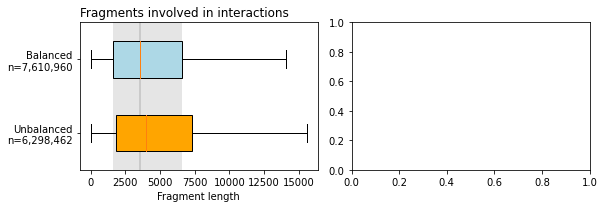

In [8]:
create_rfl_boxplot(
    u_list=di_flen_list,
    b_list=uir_flen_list,
    showfliers=False,
    title='Fragments involved in interactions',
    xlabel='Fragment length',
    output_pdf=NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX  + '_restriction_fragment_lengths.pdf')

In [9]:
di_flen_diff_list = list()
uir_flen_diff_list = list()
for d_inter in d11_interaction_set.interaction_list:
    len_5_frag = d_inter.toA - d_inter.fromA
    len_3_frag = d_inter.toB - d_inter.fromB
    len_5_3_diff = abs(len_5_frag - len_3_frag)
    if d_inter.get_category() == 'DI' or d_inter.get_category() == 'DIX':
        di_flen_diff_list.append(len_5_3_diff)
    if d_inter.get_category() == 'UIR' or d_inter.get_category() == 'UI':
        uir_flen_diff_list.append(len_5_3_diff)

In [10]:
print(np.mean(di_flen_diff_list))
print(np.mean(uir_flen_diff_list))

5386.9777263084225
4729.6804862987065


In [11]:
print(stats.mannwhitneyu(di_flen_diff_list, uir_flen_diff_list, alternative='two-sided'))

MannwhitneyuResult(statistic=6478070458212.0, pvalue=0.0)


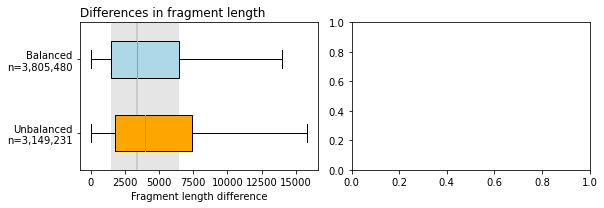

In [12]:
create_rfl_boxplot(
    u_list=di_flen_diff_list,
    b_list=uir_flen_diff_list,
    showfliers=False,
    title='Differences in fragment length',
    xlabel='Fragment length difference',
    output_pdf=NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX  + '_restriction_fragment_lengths_diff.pdf')

In [13]:
di_flen_max_list = list()
uir_flen_max_list = list()
for d_inter in d11_interaction_set.interaction_list:
    len_5_frag = d_inter.toA - d_inter.fromA
    len_3_frag = d_inter.toB - d_inter.fromB
    len_5_3_max = max(len_5_frag,len_3_frag)
    if d_inter.get_category() == 'DI' or d_inter.get_category() == 'DIX':
        di_flen_max_list.append(len_5_3_max)
    if d_inter.get_category() == 'UIR' or d_inter.get_category() == 'UI':
        uir_flen_max_list.append(len_5_3_max)

In [14]:
print(np.mean(di_flen_max_list))
print(np.mean(uir_flen_max_list))

8057.5527263639915
7211.715318698299


In [15]:
print(stats.mannwhitneyu(di_flen_max_list, uir_flen_max_list, alternative='two-sided'))

MannwhitneyuResult(statistic=6596607731612.5, pvalue=0.0)


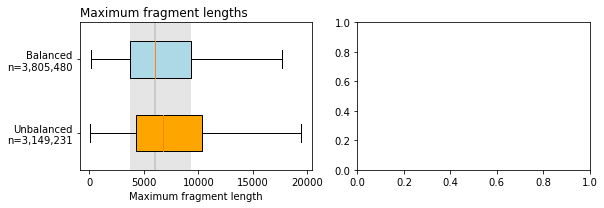

In [16]:
create_rfl_boxplot(
    u_list=di_flen_max_list,
    b_list=uir_flen_max_list,
    showfliers=False,
    title='Maximum fragment lengths',
    xlabel='Maximum fragment length',
    output_pdf=NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX  + '_restriction_fragment_lengths_max.pdf')

In [17]:
di_flen_min_list = list()
uir_flen_min_list = list()
for d_inter in d11_interaction_set.interaction_list:
    len_5_frag = d_inter.toA - d_inter.fromA
    len_3_frag = d_inter.toB - d_inter.fromB
    len_5_3_min = min(len_5_frag,len_3_frag)
    if d_inter.get_category() == 'DI' or d_inter.get_category() == 'DIX':
        di_flen_min_list.append(len_5_3_min)
    if d_inter.get_category() == 'UIR' or d_inter.get_category() == 'UI':
        uir_flen_min_list.append(len_5_3_min)

In [18]:
print(np.mean(di_flen_min_list))
print(np.mean(uir_flen_min_list))

2670.575000055569
2482.0348323995922


In [19]:
print(stats.mannwhitneyu(di_flen_min_list, uir_flen_min_list, alternative='two-sided'))

MannwhitneyuResult(statistic=6193036598525.0, pvalue=0.0)


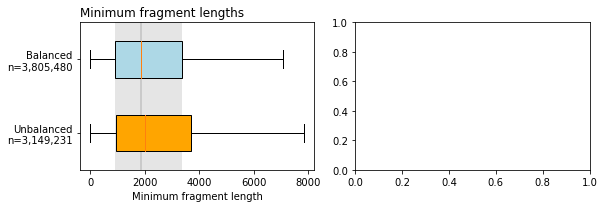

In [20]:
create_rfl_boxplot(
    u_list=di_flen_min_list,
    b_list=uir_flen_min_list,
    showfliers=False,
    title='Minimum fragment lengths',
    xlabel='Minimum fragment length',
    output_pdf=NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX  + '_restriction_fragment_lengths_min.pdf')